In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
import geopandas as gpd
from census import Census
from us import states
import itertools
from tqdm import tqdm

In [40]:
print(ox.__version__)

1.5.1


# Prepare OSM data

/Users/danielhankim/mambaforge/envs/data-visualization/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/danielhankim/mambaforge/envs/data-visualization/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/danielhankim/mambaforge/envs/data-visualization/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/danielhankim/mambaforge/envs/data-visualization/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/danielhankim/mambaforge/envs/data-visualization/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


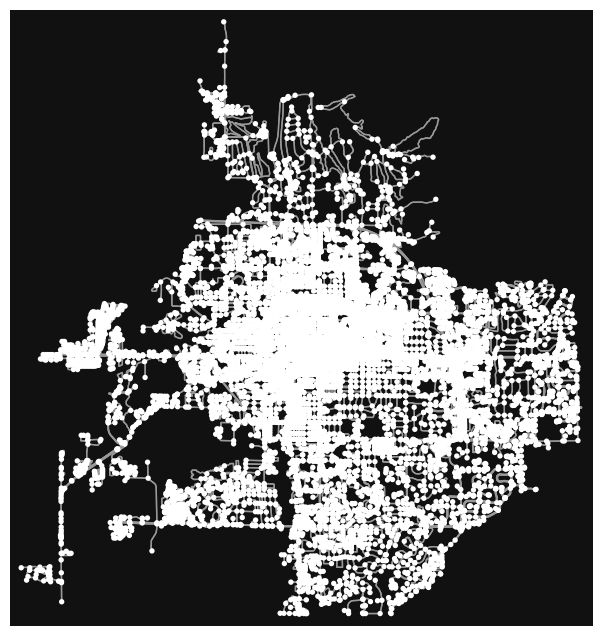

In [41]:
place_name = "Bloomington, Indiana"
G = ox.graph_from_place(place_name, network_type='walk')
fig, ax = ox.plot_graph(G)

In [42]:
amenity_dict = {'sustenance': ['bar', 'biergarten', 'cafe', 'fast_food', 
                               'food_court', 'ice_cream', 'pub', 'restaurant'],
                'education': ['college', 'driving_school', 'kindergarten', 
                              'language_school', 'library', 'toy_library',
                              'research_institute', 'training', 'music_school',
                              'school', 'traffic_park', 'university'],
                'financial': ['atm', 'bank', 'bureau_de_change'],
                'healthcare': ['baby_hatch', 'clinic', 'dentist', 'doctors',
                               'hospital', 'nursing_home', 'pharmacy',
                               'social_facility', 'veterinary'],
                'culture': ['arts_centre', 'brothel', 'casino', 'cinema',
                            'community_centre', 'conference_centre', 
                            'events_venue', 'exhibition_centre', 'fountain',
                            'gambling', 'love_hotel', 'music_venue', 
                            'nightclub', 'planetarium', 'public_bookcase',
                            'social_centre', 'stripclub', 'studio', 
                            'swingerclub', 'threatre'],
                'public': ['courthouse', 'fire_station', 'police', 
                           'post_box', 'post_depot', 'post_office',
                           'prison', 'ranger_station', 'townhall']}

sustenance = ox.features_from_place(place_name, tags={'amenity': amenity_dict['sustenance']})
education = ox.features_from_place(place_name, tags={'amenity': amenity_dict['education']})
financial = ox.features_from_place(place_name, tags={'amenity': amenity_dict['financial']})
healthcare = ox.features_from_place(place_name, tags={'amenity': amenity_dict['healthcare']})
culture = ox.features_from_place(place_name, tags={'amenity': amenity_dict['culture']})
public = ox.features_from_place(place_name, tags={'amenity': amenity_dict['public']})

sustenance = sustenance[['amenity', 'name', 'geometry']]
education = education[['amenity', 'name', 'geometry']]
financial = financial[['amenity', 'name', 'geometry']]
healthcare = healthcare[['amenity', 'name', 'geometry']]
culture = culture[['amenity', 'name', 'geometry']]
public = public[['amenity', 'name', 'geometry']]

/Users/danielhankim/mambaforge/envs/data-visualization/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/danielhankim/mambaforge/envs/data-visualization/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/danielhankim/mambaforge/envs/data-visualization/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/danielhankim/mambaforge/envs/data-visualization/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/danielhankim/mambaforge/envs/data-visualization/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.int

# CBG data

In [43]:
ymax = 39.220964
ymin = 39.119441
xmax = -86.472109
xmin = -86.591585

path = "../data/external/tl_rd22_18_bg"
gdf = gpd.read_file(path)
gdf = gdf.to_crs("EPSG:4326")
gdf = gdf.cx[xmin:xmax, ymin:ymax]
gdf = gdf.reset_index()

/Users/danielhankim/mambaforge/envs/data-visualization/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


In [44]:
gdf = gdf[['GEOID', 'TRACTCE', 'geometry']]
gdf

,GEOID,TRACTCE,geometry
0,181050005014,000501,"POLYGON ((-86.58634 39.14568, -86.58633 39.145..."
1,181050006013,000601,"POLYGON ((-86.56501 39.17101, -86.56500 39.171..."
2,181050008012,000801,"POLYGON ((-86.55510 39.18784, -86.55506 39.188..."
3,181050008021,000802,"POLYGON ((-86.51460 39.20067, -86.51452 39.200..."
4,181050009012,000901,"POLYGON ((-86.50945 39.16823, -86.50915 39.168..."
...,...,...,...
70,181050005023,000502,"POLYGON ((-86.60652 39.12788, -86.60530 39.128..."
71,181050016001,001600,"POLYGON ((-86.53471 39.17983, -86.53470 39.180..."
72,181050016002,001600,"POLYGON ((-86.53856 39.17361, -86.53855 39.173..."
73,181050016003,001600,"POLYGON ((-86.52836 39.17864, -86.52833 39.179..."


<Axes: >

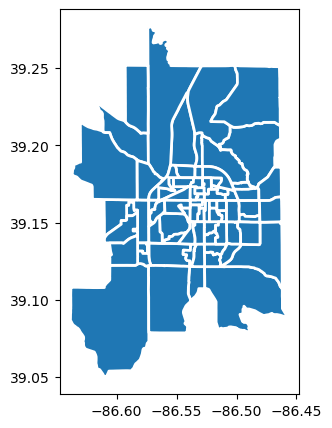

In [45]:
gdf.plot(figsize = (5, 5), lw = 2., ec = 'w')

# Calc average time

In [46]:
amenities = {'sustenance': sustenance,
             'education': education,
             'financial': financial,
             'healthcare': healthcare,
             'culture': culture,
             'public': public}

# Find the nearest node from the representative point of a CBG
gdf['rep_x'] = gdf['geometry'].representative_point().x
gdf['rep_y'] = gdf['geometry'].representative_point().y
gdf['node_id'] = ox.nearest_nodes(G, gdf['rep_x'], gdf['rep_y'])

for amenity_type, amenity_df in amenities.items():
    print(f'processing {amenity_type}')
    amenity_df['rep_x'] = amenity_df['geometry'].representative_point().x
    amenity_df['rep_y'] = amenity_df['geometry'].representative_point().y
    amenity_df['node_id'] = ox.nearest_nodes(G, amenity_df['rep_x'], amenity_df['rep_y'])

    distance_dict = {'node_id': [], f'{amenity_type}_distance': []}
    for cbg_node_id in tqdm(gdf['node_id']):
        distance = 0
        for amenity_node_id in amenity_df['node_id']:
            if cbg_node_id != amenity_node_id:
                route = ox.shortest_path(G, cbg_node_id, amenity_node_id, weight='length')
                distance += sum(ox.utils_graph.route_to_gdf(G, route, "length")["length"]) / len(amenity_df['node_id'])
        
        distance_dict['node_id'].append(cbg_node_id)
        distance_dict[f'{amenity_type}_distance'].append(distance)

    new_df = pd.DataFrame.from_dict(distance_dict)
    gdf = pd.merge(gdf, new_df, left_index=True, right_index=True)

    speed = 4.5 / 60 * 1000  # 4.5 km/h * 1h/60min * 1000m / 1km (source: https://www.medicalnewstoday.com/articles/average-walking-speed#average-speed-by-age)
    gdf[f'{amenity_type}_time'] = gdf[f'{amenity_type}_distance'] / speed
    gdf.drop(columns=['node_id_y'], inplace=True)
    gdf.rename(columns={'node_id_x': 'node_id'}, inplace=True)
    
gdf

processing sustenance


100%|██████████| 75/75 [32:18<00:00, 25.84s/it]


processing education


100%|██████████| 75/75 [03:27<00:00,  2.76s/it]


processing financial


100%|██████████| 75/75 [04:32<00:00,  3.63s/it]


processing healthcare


100%|██████████| 75/75 [04:59<00:00,  3.99s/it]


processing culture


100%|██████████| 75/75 [05:19<00:00,  4.26s/it]


processing public


100%|██████████| 75/75 [01:59<00:00,  1.60s/it]


,GEOID,TRACTCE,geometry,rep_x,rep_y,node_id,sustenance_distance,sustenance_time,education_distance,education_time,financial_distance,financial_time,healthcare_distance,healthcare_time,culture_distance,culture_time,public_distance,public_time
0,181050005014,000501,"POLYGON ((-86.58634 39.14568, -86.58633 39.145...",-86.577947,39.150951,7555701751,6931.308125,92.417442,7459.888207,99.465176,6999.294447,93.323926,6852.826714,91.371023,7660.642273,102.141897,6755.267588,90.070235
1,181050006013,000601,"POLYGON ((-86.56501 39.17101, -86.56500 39.171...",-86.548252,39.171829,180585594,3446.477348,45.953031,3850.677759,51.342370,3853.323447,51.377646,4238.100571,56.508008,4056.770182,54.090269,2998.289353,39.977191
2,181050008012,000801,"POLYGON ((-86.55510 39.18784, -86.55506 39.188...",-86.544738,39.210217,7548213394,7013.948527,93.519314,7132.307241,95.097430,7437.484316,99.166458,7895.659071,105.275454,7482.469591,99.766261,6511.398059,86.818641
3,181050008021,000802,"POLYGON ((-86.51460 39.20067, -86.51452 39.200...",-86.484924,39.193585,2873940738,5605.058621,74.734115,5761.652793,76.822037,5996.012553,79.946834,6876.154905,91.682065,5469.111864,72.921492,5224.737941,69.663173
4,181050009012,000901,"POLYGON ((-86.50945 39.16823, -86.50915 39.168...",-86.504876,39.167928,180605646,3042.519711,40.566929,3396.282931,45.283772,3416.012947,45.546839,4335.358071,57.804774,2689.665455,35.862206,2712.961294,36.172817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,181050005023,000502,"POLYGON ((-86.60652 39.12788, -86.60530 39.128...",-86.593942,39.132421,180584797,9248.160023,123.308800,9773.664138,130.315522,9318.861105,124.251481,9165.690524,122.209207,9975.064364,133.000858,9070.188294,120.935844
71,181050016001,001600,"POLYGON ((-86.53471 39.17983, -86.53470 39.180...",-86.531491,39.182637,9448228271,3574.862352,47.664831,3852.290276,51.363870,3952.758105,52.703441,4786.459810,63.819464,3938.588955,52.514519,2932.204353,39.096058
72,181050016002,001600,"POLYGON ((-86.53856 39.17361, -86.53855 39.173...",-86.533021,39.175787,6594078975,2843.548867,37.913985,3308.264414,44.110192,3246.329605,43.284395,4045.936286,53.945817,3256.341273,43.417884,2192.538118,29.233842
73,181050016003,001600,"POLYGON ((-86.52836 39.17864, -86.52833 39.179...",-86.524657,39.173850,2860570800,2749.143180,36.655242,3100.316069,41.337548,3139.544368,41.860592,4076.856190,54.358083,2898.730477,38.649740,2119.105412,28.254739


In [48]:
gdf.to_csv('../data/processed/Bloomington_CBG_Amenity_15_Minute_Walk.csv')

<Axes: >

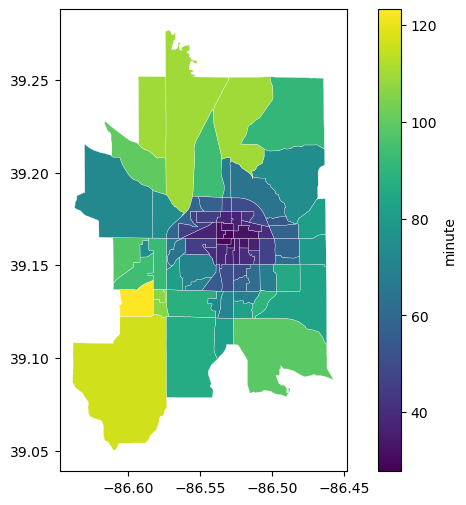

In [49]:
gdf.plot(figsize=(8, 6),
         column='sustenance_time',
         legend=True, 
         ec='w',
         lw=0.2,
         legend_kwds={"label": "minute", "orientation": "vertical"})

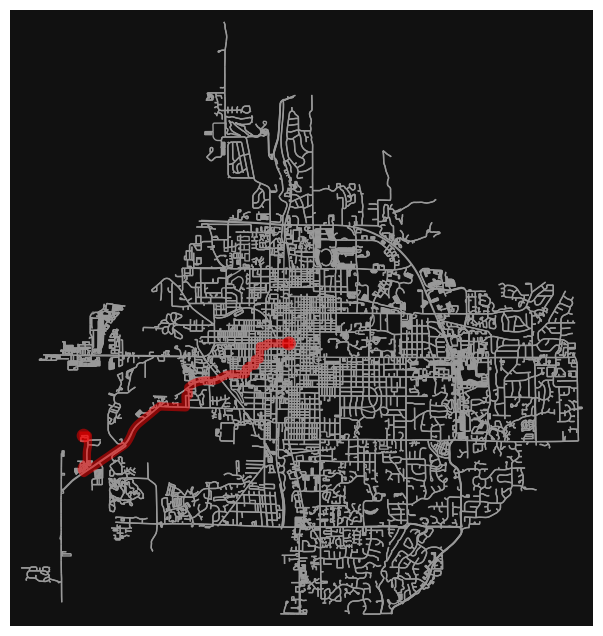

In [24]:
# plot the routes
fig, ax = ox.plot_graph_route(G, 
                              route=sp_routes[0], 
                              route_color="r", 
                              route_linewidth=6, 
                              node_size=0)

In [187]:
route_length = int(sum(ox.utils_graph.route_to_gdf(G, route[0], "length")["length"]))
route_time = int(sum(ox.utils_graph.route_to_gdf(G, route[0], "travel_time")["travel_time"]))
print("Route is", route_length, "meters and takes", route_time, "seconds.")

Route is 4524 meters and takes 727 seconds.


In [68]:
# Find the nearest node from the representative point of a CBG
gdf['rep_x'] = gdf['geometry'].representative_point().x
gdf['rep_y'] = gdf['geometry'].representative_point().y
gdf['node_id'] = ox.nearest_nodes(G, gdf['rep_x'], gdf['rep_y'])

# Find the nearest node from the representative point of an amenity
sustenance['rep_x'] = sustenance['geometry'].representative_point().x
sustenance['rep_y'] = sustenance['geometry'].representative_point().y
sustenance['node_id'] = ox.nearest_nodes(G, sustenance['rep_x'], sustenance['rep_y'])


distance_dict = {'node_id': [], 'sustenance_distance': []}
for cbg_node_id in tqdm(gdf['node_id']):
    distance = 0
    for amenity_node_id in sustenance['node_id']:
        if cbg_node_id != amenity_node_id:
            route = ox.shortest_path(G, cbg_node_id, amenity_node_id, weight='length')
            distance += sum(ox.utils_graph.route_to_gdf(G, route, "length")["length"]) / len(sustenance['node_id'])
    
    distance_dict['node_id'].append(cbg_node_id)
    distance_dict['sustenance_distance'].append(distance)

new_df = pd.DataFrame.from_dict(distance_dict)
gdf = pd.merge(gdf, new_df, on='node_id')


# Divide the path length with speed and the average travel time
speed = 20 / 60 * 1000  # 20 km/h * 1h/60min * 1000m / 1km (source: https://bikecommuterhero.com/whats-the-average-cycling-speed-of-a-bike-commuter/?expand_article=1)
gdf['sustenance_time'] = gdf['sustenance_distance'] / speed

gdf


100%|██████████| 75/75 [13:07<00:00, 10.50s/it]


,GEOID,TRACTCE,geometry,rep_x,rep_y,node_id,sustenance_distance,sustenance_time
0,181050005014,000501,"POLYGON ((-86.58634 39.14568, -86.58633 39.145...",-86.577947,39.150951,7555701751,7051.921848,21.155766
1,181050006013,000601,"POLYGON ((-86.56501 39.17101, -86.56500 39.171...",-86.548252,39.171829,180585594,3275.553953,9.826662
2,181050008012,000801,"POLYGON ((-86.55510 39.18784, -86.55506 39.188...",-86.544738,39.210217,7548213394,7042.669422,21.128008
3,181050008021,000802,"POLYGON ((-86.51460 39.20067, -86.51452 39.200...",-86.484924,39.193585,2873940738,5720.451504,17.161355
4,181050009012,000901,"POLYGON ((-86.50945 39.16823, -86.50915 39.168...",-86.504876,39.167928,180605646,3139.792711,9.419378
...,...,...,...,...,...,...,...,...
78,181050005023,000502,"POLYGON ((-86.60652 39.12788, -86.60530 39.128...",-86.593942,39.132421,180584797,9350.012379,28.050037
79,181050016001,001600,"POLYGON ((-86.53471 39.17983, -86.53470 39.180...",-86.531491,39.182637,1743002581,3637.295473,10.911886
80,181050016002,001600,"POLYGON ((-86.53856 39.17361, -86.53855 39.173...",-86.533021,39.175787,6594078975,2935.691195,8.807074
81,181050016003,001600,"POLYGON ((-86.52836 39.17864, -86.52833 39.179...",-86.524657,39.173850,2860570800,2824.788289,8.474365


In [117]:
# check edge attribute

# count = 0

# for edge in list(G.edges(data=True)):
#     for key in edge[2]:
#         if key == 'maxspeed':
#             if (edge[2]['maxspeed'][-3:] != 'mph'):
#                 print(edge[2]['maxspeed'])
#             count += 1


# print(count)
    

In [119]:
# edges = ox.graph_to_gdfs(G, nodes=False)
# edges["highway"] = edges["highway"].astype(str)
# edges.groupby("highway")[["length", "speed_kph", "travel_time"]].mean().round(1)

,length,speed_kph,travel_time
highway,,,
"['footway', 'path']",288.9,33.3,31.2
"['footway', 'residential']",182.8,33.3,19.8
"['footway', 'unclassified']",17.3,33.3,1.9
"['path', 'residential']",130.7,33.3,14.1
"['primary', 'secondary']",467.6,73.1,23.0
"['residential', 'path']",130.7,20.0,23.5
"['service', 'footway']",128.7,33.3,13.9
"['service', 'path']",94.7,33.3,10.2
"['service', 'residential']",118.2,33.3,12.8
